<a href="https://colab.research.google.com/github/jnsbrdbr/Programming-Exercise_andrewNG/blob/master/Programming%20Exercise%201%20-%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Linear Regression with One Variable

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data1.txt
data=pd.read_csv('ex1data1.txt', header=None).values

--2022-07-21 15:56:09--  https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘ex1data1.txt.16’

ex1data1.txt.16     100%[===================>]   1.33K  --.-KB/s    in 0s      

2022-07-21 15:56:09 (38.3 MB/s) - ‘ex1data1.txt.16’ saved [1359/1359]



In [3]:
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

In [4]:
data.shape

(97, 2)

In [5]:
x=data[:,0].reshape(-1,1)
y=data[:,1]
m=len(y)

In [6]:
y.shape

(97,)

In [7]:
x.shape

(97, 1)

In [8]:
theta=np.zeros(2)
num_iters = 1500
alpha = 0.01

In [9]:
theta.shape

(2,)

In [10]:
ones=np.ones((m,1))
X=np.hstack((ones,x))

In [11]:
def costfunction(X,y,theta):
  h=X.dot(theta)
  j = (1/(2*m)) * (np.sum((h - y)**2))
  return j

In [12]:
j = costfunction(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', j)

With theta = [0 ; 0]
Cost computed = 32.072733877455676


it means that the hypothesis in theta(0,0) have the diffrence of 32.07 with it s actual y

In [13]:
j = costfunction(X, y, [-1,2])
print('With theta = [-1 ; 2]\nCost computed =', j)

With theta = [-1 ; 2]
Cost computed = 54.24245508201238


In [14]:
def gradient(X,y,theta,alpha,num_iters):
  j_history=np.zeros(num_iters)
  theta_0=theta.copy()
  for i in range(0,num_iters):
    h=X.dot(theta_0)
    diff=h-y
    delta=(1/m)*(diff.dot(X))
    theta_0=theta_0 - (alpha*(delta.T))
    j_history[i]=costfunction(X,y,theta_0)
  return theta_0,j_history

In [15]:
theta, _ = gradient(X, y, theta, alpha, num_iters)
print('Theta found by gradient descent:\n', theta)

Theta found by gradient descent:
 [-3.63029144  1.16636235]


this two point show the best fit of hypothesis to the data

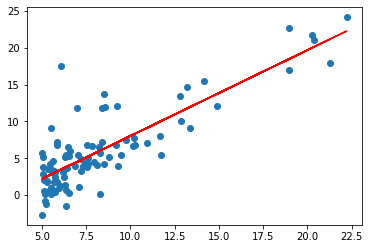

In [16]:
plt.scatter(x, y)
plt.plot(X[:,1], X.dot(theta), color='r')

1.2 Visualizing J(@)

In [17]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [18]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [19]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = costfunction(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

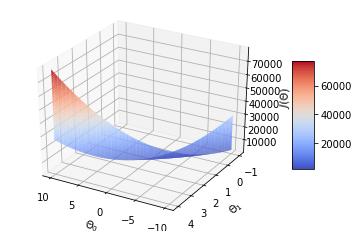

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)

1.3 Equivalent Code using Scikit-Learn

In [22]:


from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)



LinearRegression()

In [23]:
lin_reg.intercept_, lin_reg.coef_

(-3.8957808783118484, array([1.19303364]))


2. Linear Regression with Multiple Variables

In [24]:
!wget https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data2.txt

data_mul= pd.read_csv('ex1data2.txt',header=None,error_bad_lines=False)

--2022-07-21 16:24:59--  https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [text/plain]
Saving to: ‘ex1data2.txt’

ex1data2.txt        100%[===================>]     657  --.-KB/s    in 0s      

2022-07-21 16:24:59 (15.7 MB/s) - ‘ex1data2.txt’ saved [657/657]



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
data_mul.columns=['house_size', 'bedrooms', 'house_price']

In [31]:
def feature_normalization(x,mean=np.zeros(1),std=np.zeros(1)):
  x=np.array(x)
  if len(mean.shape)==1 or len(std.shape)==1:
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0, ddof=1)
  x = (x - mean)/std
  return x, mean, std

In [32]:
x_norm, mu, sigma = feature_normalization(data_mul[['house_size', 'bedrooms']])

In [34]:
data_mul['house_size_normalized'] = x_norm[:,0]
data_mul['bedrooms_normalized'] = x_norm[:,1]

In [45]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [46]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [47]:
m = data_mul.shape[0]
X = np.hstack((np.ones((m,1)),x_norm))
y = np.array(data_mul.house_price.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

In [48]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

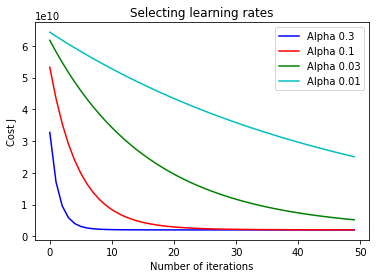

In [49]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

یعنی به ازای هر لرنیگ ریتی به یک شکل خاص همگرا میشه

In [50]:
iterations = 250
alpha = 0.1
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[340412.65957372]
 [110630.26530813]
 [ -6648.6893001 ]]


In [51]:
sqft = (1650 - mu[0])/sigma[0]
bedrooms = (3 - mu[1])/sigma[1]
y_pred = theta[0] + theta[1]*sqft + theta[2]*bedrooms
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

'Price of a house with 1650 square feet and 3 bedrooms: 293081.63514221634$'


2.3 Equivalent Code using Scikit-Learn

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_norm, y)

LinearRegression()

In [53]:
lin_reg.intercept_, lin_reg.coef_

(array([340412.65957447]), array([[110631.05027885,  -6649.47427082]]))